# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Dictionary

Data Dictionary:


*   order_id: Unique ID of the order

*   customer_id: ID of the customer who ordered the food

*   restaurant_name: Name of the restaurant

*   cuisine_type: Cuisine ordered by the customer

*   cost_of_the_order: Price paid per order

*   day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

*   rating: Rating given by the customer out of 5

*   food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

*   delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
# Write your code here to read the data
df = pd.read_csv('/content/foodhub_order (1).csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
rows, columns = df.shape
print(f'The data has {rows} rows and {columns} columns.')

The data has 1898 rows and 9 columns.


#### Observations:
The data has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset has 4 integer columns, 1 float column, and 4 object columns. All columns are non-null.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There is No missing value in dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [10]:
summary = df['food_preparation_time'].describe()
min_time = summary['min']
mean_time = summary['mean']
max_time = summary['max']
print(f'Minimum preparation time: {min_time}')
print(f'Average preparation time: {mean_time}')
print(f'Maximum preparation time: {max_time}')

Minimum preparation time: 20.0
Average preparation time: 27.371970495258168
Maximum preparation time: 35.0


#### Observations:


*   Minimum preparation time: 20.0 minutes
*   Average preparation time: 27.37 minutes
*   Maximum preparation time: 35.0 minutes






### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
df['rating'].isnull().sum()

0

In [12]:
not_rated = df[df['rating'] == 'Not given'].shape[0]
print(f'There are {not_rated} orders that are not rated.')

There are 736 orders that are not rated.


#### Observations:
736 order were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

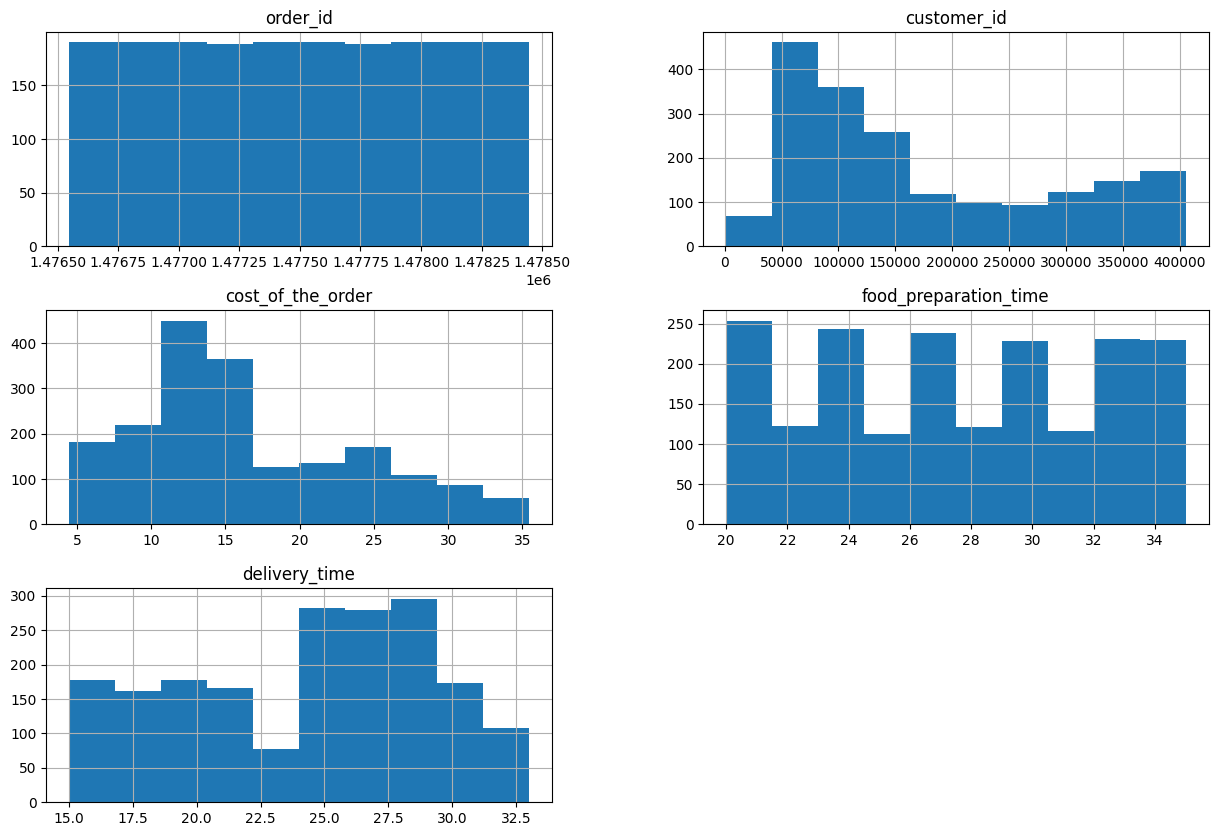

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


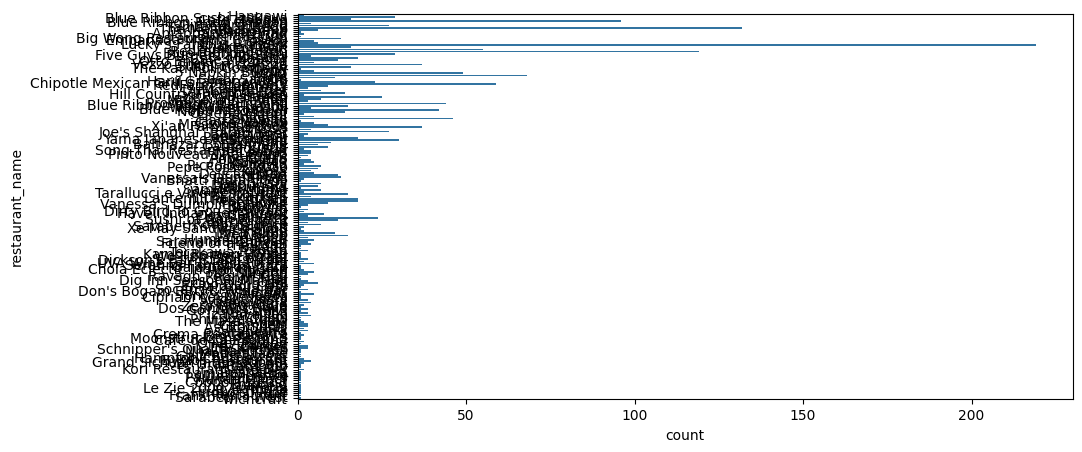

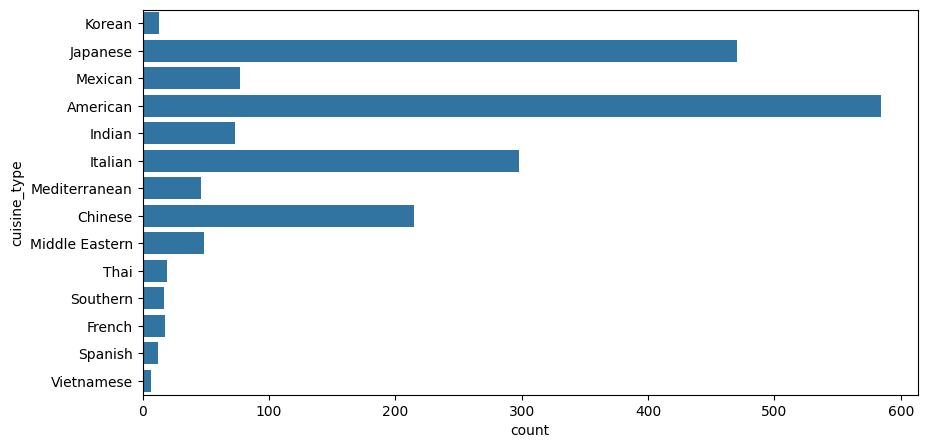

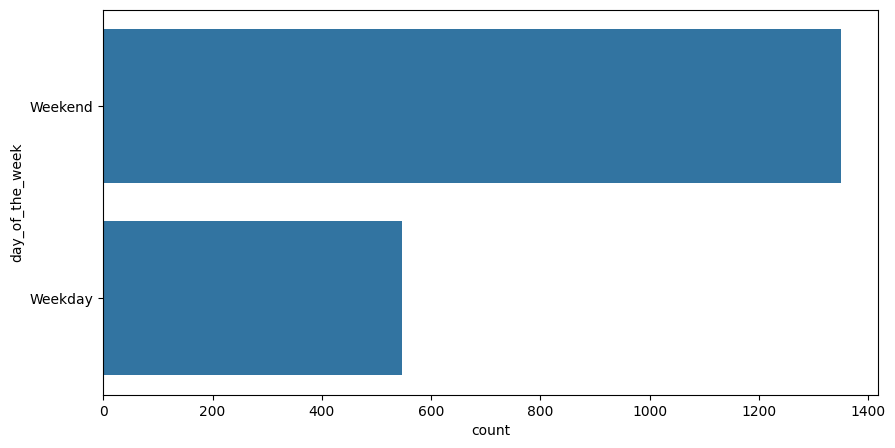

In [13]:
# Write the code here
df.hist(figsize=(15, 10))
plt.show()


categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.show()

### Observations:

* 'Shake Shack' is the most frequent restaurant in the data.
*  Cuisine types are fairly evenly distributed.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [14]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)
top_5_restaurants = top_restaurants.index.tolist()
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64
['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


#### Observations:
The Top 5 Restaurant Name:
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm







### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [15]:
# Write the code here
df['day_of_the_week'] = df['day_of_the_week'].replace(['Weekend', 'Weekday'], ['Saturday', 'Sunday'])

weekend_data = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]
popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()
print(f'The most popular cuisine on weekends is: {popular_cuisine}')

The most popular cuisine on weekends is: American


#### Observations:
American is most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [16]:
# Write the code here
more_than_20_dollars = df[df['cost_of_the_order'] > 20].shape[0]
percentage = (more_than_20_dollars / df.shape[0]) * 100
print(f'Percentage of orders costing more than 20 dollars: {percentage:.2f}%')


Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:
29% of order cost more than 20 dollar


### **Question 10**: What is the mean order delivery time? [1 mark]

In [17]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(f'The mean order delivery time is: {mean_delivery_time} minutes')

The mean order delivery time is: 24.161749209694417 minutes


#### Observations:
Mean Order of delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [18]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)
print(top_customers)
customer_ids = top_customers.index.tolist()
print(customer_ids)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
[52832, 47440, 83287]


#### Observations:
Top 3 most frequent customers and the number of orders they placed:

1.   Customer_id 52832 - 13 orders
2.   Customer_id 47440 - 10 orders
3.   Customer_id 83287 - 09 orders






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


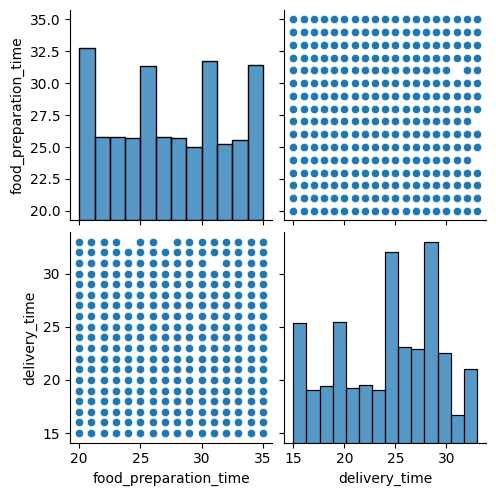

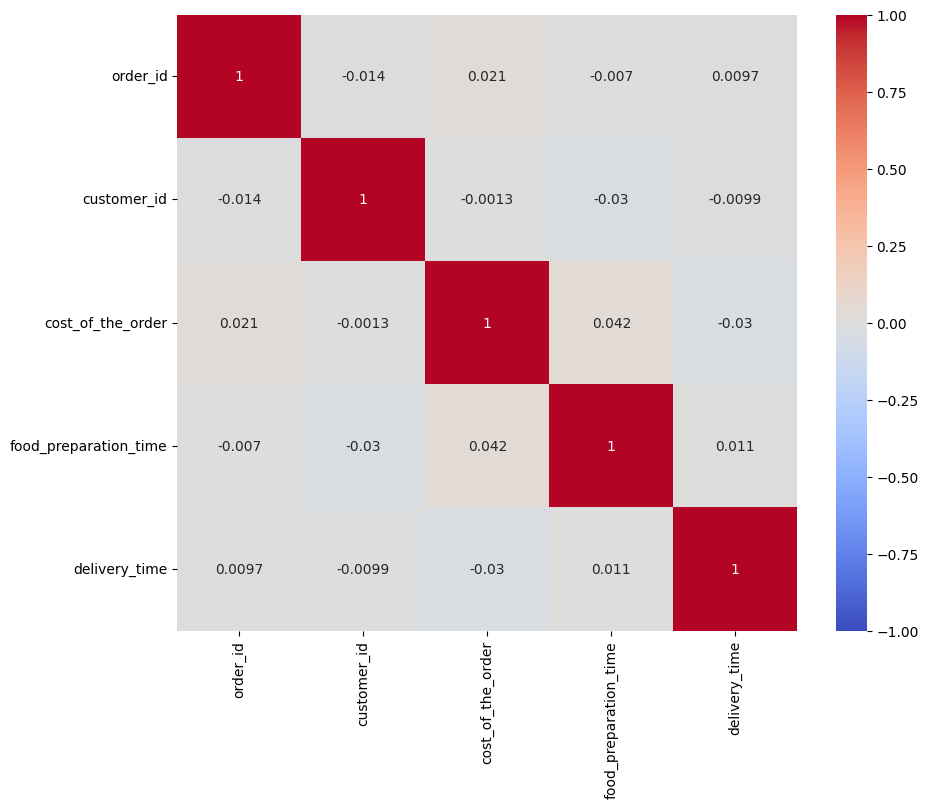

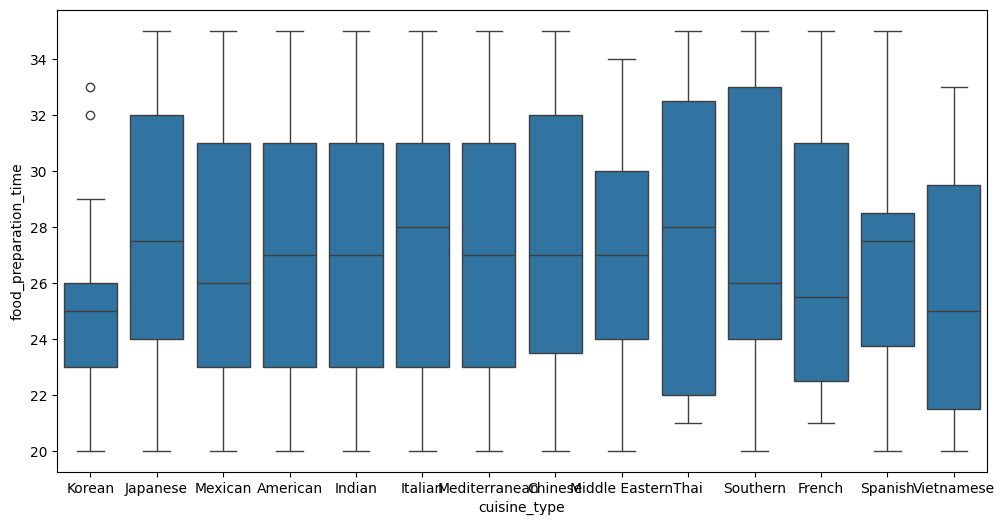

In [19]:
# Write the code here
sns.pairplot(df[['food_preparation_time', 'delivery_time', 'rating']])
plt.show()

# Heatmap for correlation
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Boxplot for numerical vs categorical
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [20]:
# Write the code here
# Cleaning the 'rating' column
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

# Calculate restaurant ratings
restaurant_ratings = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
restaurant_ratings.columns = ['rating_count', 'average_rating']

# Find restaurants eligible for promotional offers
promotional_offers = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]
print('Restaurants eligible for promotional offers:')
print(promotional_offers)

Restaurants eligible for promotional offers:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:
Restaurants eligible for promotional offers:
*   Shake Shack   
*   The Meatball Shop
*   Blue Ribbon Sushi                    
*   Blue Ribbon Fried Chicken




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [21]:
# Write the code here
df['revenue'] = df['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0))
net_revenue = df['revenue'].sum()
print(f'The net revenue generated by the company is: ${net_revenue:.2f}')

The net revenue generated by the company is: $3865.57


<ipython-input-21-fab22ddb65e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0))


#### Observations:
The net revenue generated by the company is $3865.57.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [22]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
more_than_60_minutes = df[df['total_delivery_time'] > 60].shape[0]
percentage_more_than_60_minutes = (more_than_60_minutes / df.shape[0]) * 100
print(f'Percentage of orders taking more than 60 minutes: {percentage_more_than_60_minutes:.2f}%')

Percentage of orders taking more than 60 minutes: 10.24%


<ipython-input-22-aa0ebe75e2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']


#### Observations:
10.24% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [23]:
# Write the code here

mean_delivery_time_weekday = df[df['day_of_the_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]['delivery_time'].mean()
print(f'Mean delivery time on weekdays: {mean_delivery_time_weekday} minutes')
print(f'Mean delivery time on weekends: {mean_delivery_time_weekend} minutes')


Mean delivery time on weekdays: nan minutes
Mean delivery time on weekends: 24.15404475043029 minutes


#### Observations:
mean delivery on weekends is 24.15 min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  American cuisine is the most popular on weekends.
*   The company earns significant revenue ($3865.57.) from commission fees on orders.
*  The majority of the orders come from a few top restaurants like Shake Shack, The Meatball Shop,Blue Ribbon Sushi and Blue Ribbon Fried Chicken .
* A significant percentage (29%) of orders cost more than 20 dollars.



### Recommendations:

* Focus promotional offers on top-performing restaurants like Shake Shack, The Meatball Shop,Blue Ribbon Sushi and Blue Ribbon Fried Chicken to boost customer engagement.

* Offer weekend specials for American cuisine, as it is the most popular on weekends, to attract more customers.
*  Implement targeted discounts for orders above 20 dollars to increase high-value orders and customer satisfaction.




